<a href="https://colab.research.google.com/github/minjikim7526/TIL/blob/master/%ED%8C%8C%EC%83%9D%EB%B3%80%EC%88%98_%EC%83%9D%EC%84%B1_1%EC%9D%B8%EA%B0%80%EA%B5%AC%EC%88%98%EB%8B%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 모듈 불러오기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt install fonts-nanum

!sudo apt install font-manager
!rm -rf ~/.cache/matplotlib
!pip install koreanize-matplotlib
!pip install pyproj
!pip install geopandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
import matplotlib.dates as md
from matplotlib import rc
import koreanize_matplotlib
from datetime import datetime
import matplotlib.dates as md
from pyproj import Transformer
import geopandas as gpd
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 경로 수정 필요
%cd /content/drive/MyDrive/FinalPJT

/content/drive/MyDrive/FinalPJT


# 2. 데이터 불러오기

In [5]:
df = pd.read_excel('/content/drive/MyDrive/FinalPJT/2023.1월_29개 통신정보(쇼핑정보만 전처리)_최종.xlsx')

In [6]:
df.head(3)

,행정동코드,자치구,행정동,성별,연령대,총인구수,혼자사는가구수,쇼핑서비스사용미추정인구수,쇼핑서비스사용일수,"쇼핑서비스사용일수:4분위수,25%","쇼핑서비스사용일수:4분위수,50%","쇼핑서비스사용일수:4분위수,75%"
0,1125070,강동구,둔촌1동,2,25,586.0,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.0,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.0,355.32,52.86,127.95,43.33,81.67,201.67


In [7]:
df2 = pd.read_csv('/content/drive/MyDrive/FinalPJT/자치구단위 월별 택배 도착지 데이터.csv', encoding = 'euc-kr')

In [8]:
df2.head()

,기준년월(BASE_DY),자치구(ADDR),대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_기타(E_C_02),대분류_착지물동량_도서/음반(E_C_03),대분류_착지물동량_디지털/가전(E_C_04),대분류_착지물동량_생활/건강(E_C_05),대분류_착지물동량_스포츠/레저(E_C_06),대분류_착지물동량_식품(E_C_07),대분류_착지물동량_출산/육아(E_C_08),...,중분류_착지물동량_스킨케어(E_C_11_09),중분류_착지물동량_클렌징(E_C_11_10),중분류_착지물동량_향수(E_C_11_11),중분류_착지물동량_헤어스타일링(E_C_11_12),중분류_착지물동량_헤어케어(E_C_11_13),Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146
0,202103,강남구,25035.0,281991.0,27333.0,51770.0,198635.0,13054,173813,14363,...,25652,9804,2174,3588,5058,NaN,NaN,NaN,NaN,NaN
1,202104,서초구,19508.0,259466.0,48374.0,38415.0,165677.0,17343,175048,12809,...,16368,8505,1938,3307,12029,NaN,NaN,NaN,NaN,NaN
2,202105,서대문구,16904.0,384154.0,29689.0,46772.0,76597.0,17717,466881,14987,...,18570,5389,1509,2114,11127,NaN,NaN,NaN,NaN,NaN
3,202102,강서구,46705.0,216690.0,49027.0,30791.0,292619.0,12504,161749,8194,...,27236,7376,2187,1101,13519,NaN,NaN,NaN,NaN,NaN
4,202102,성동구,35119.0,240743.0,94856.0,88985.0,158192.0,16432,262624,11800,...,33971,5788,1853,3256,7275,NaN,NaN,NaN,NaN,NaN


In [9]:
# 컬럼명 통일
df2.rename(columns={'자치구(ADDR)':'자치구'},inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 147 entries, 기준년월(BASE_DY) to Unnamed: 146
dtypes: float64(10), int64(136), object(1)
memory usage: 57.5+ KB


# 3. 자치구별 1인가구수

In [11]:
shop = df.pivot_table(values='혼자사는가구수', index='자치구', aggfunc = 'sum').reset_index()
shop

,자치구,혼자사는가구수
0,강남구,83017.11
1,강동구,58913.39
2,강북구,48503.63
3,강서구,83887.16
4,관악구,140447.33
5,광진구,72089.47
6,구로구,62968.00
7,금천구,45343.01
8,노원구,59908.21
9,도봉구,37107.68


# 4. 자치구별 모든 대분류 - 반복문 작성

In [12]:
cat_all = df2.pivot_table(index='자치구', aggfunc = 'sum').reset_index()
cat_all.head()

,자치구,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,기준년월(BASE_DY),대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_기타(E_C_02),대분류_착지물동량_도서/음반(E_C_03),...,중분류_착지물동량_하의(E_C_09_10),중분류_착지물동량_학습기기(E_C_04_23),중분류_착지물동량_한복/파티복(E_C_09_11),중분류_착지물동량_향수(E_C_11_11),중분류_착지물동량_헤어스타일링(E_C_11_12),중분류_착지물동량_헤어액세서리(E_C_10_16),중분류_착지물동량_헤어케어(E_C_11_13),중분류_착지물동량_헬스(E_C_06_18),중분류_착지물동량_홈데코(E_C_01_12),중분류_착지물동량_화방용품(E_C_05_17)
0,강남구,33795.0,4613.0,4281.0,2490.0,24306.0,404113,2268878.890,3079960.318,1180923.764,...,53201,7389,30055,9438,17245,1899,6520,3457,2798,7322
1,강동구,22510.0,6611.0,1505.0,2310.0,7752.0,404110,1977927.236,2311381.394,1314707.643,...,51014,7619,27615,12570,11800,3463,14005,2071,3047,6387
2,강북구,20489.0,5018.0,3105.0,3089.0,11855.0,404114,2106732.269,3013384.534,1279722.113,...,48024,5998,22895,17933,9296,5314,11988,2763,2534,5543
3,강서구,21427.0,6152.0,2682.0,2836.0,12462.0,404108,2023247.746,2120692.665,1198224.042,...,40270,8676,26473,9335,9015,2159,15728,2356,1650,6770
4,관악구,36193.0,4528.0,3215.0,1286.0,13589.0,404112,2960630.620,2885948.012,1228265.689,...,31642,7172,26931,8488,5842,3281,9018,1404,2191,8618


In [13]:
droplist = ['Unnamed: 142','Unnamed: 143','Unnamed: 144','Unnamed: 145','Unnamed: 146','기준년월(BASE_DY)']
for col in droplist:
  cat_all.drop(col, axis = 1, inplace = True)

In [14]:
cat_all.head()

,자치구,대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_기타(E_C_02),대분류_착지물동량_도서/음반(E_C_03),대분류_착지물동량_디지털/가전(E_C_04),대분류_착지물동량_생활/건강(E_C_05),대분류_착지물동량_스포츠/레저(E_C_06),대분류_착지물동량_식품(E_C_07),대분류_착지물동량_출산/육아(E_C_08),대분류_착지물동량_패션의류(E_C_09),...,중분류_착지물동량_하의(E_C_09_10),중분류_착지물동량_학습기기(E_C_04_23),중분류_착지물동량_한복/파티복(E_C_09_11),중분류_착지물동량_향수(E_C_11_11),중분류_착지물동량_헤어스타일링(E_C_11_12),중분류_착지물동량_헤어액세서리(E_C_10_16),중분류_착지물동량_헤어케어(E_C_11_13),중분류_착지물동량_헬스(E_C_06_18),중분류_착지물동량_홈데코(E_C_01_12),중분류_착지물동량_화방용품(E_C_05_17)
0,강남구,2268878.890,3079960.318,1180923.764,1.231626e+06,3.705958e+06,71294,437830,75390,396901,...,53201,7389,30055,9438,17245,1899,6520,3457,2798,7322
1,강동구,1977927.236,2311381.394,1314707.643,9.999765e+05,4.215414e+06,40812,531752,43957,251420,...,51014,7619,27615,12570,11800,3463,14005,2071,3047,6387
2,강북구,2106732.269,3013384.534,1279722.113,1.010716e+06,1.179115e+07,63572,597931,42478,285998,...,48024,5998,22895,17933,9296,5314,11988,2763,2534,5543
3,강서구,2023247.746,2120692.665,1198224.042,1.620954e+06,6.215717e+06,49463,384098,60613,140176,...,40270,8676,26473,9335,9015,2159,15728,2356,1650,6770
4,관악구,2960630.620,2885948.012,1228265.689,1.044388e+06,4.924974e+06,49310,550655,43753,280907,...,31642,7172,26931,8488,5842,3281,9018,1404,2191,8618


In [15]:
collist = cat_all.columns.to_list()
collist

['자치구',
 '대분류_착지물동량_가구/인테리어(E_C_01)',
 '대분류_착지물동량_기타(E_C_02)',
 '대분류_착지물동량_도서/음반(E_C_03)',
 '대분류_착지물동량_디지털/가전(E_C_04)',
 '대분류_착지물동량_생활/건강(E_C_05)',
 '대분류_착지물동량_스포츠/레저(E_C_06)',
 '대분류_착지물동량_식품(E_C_07)',
 '대분류_착지물동량_출산/육아(E_C_08)',
 '대분류_착지물동량_패션의류(E_C_09)',
 '대분류_착지물동량_패션잡화(E_C_10)',
 '대분류_착지물동량_화장품/미용(E_C_11)',
 '중분류_착지물동량_DIY자재/용품(E_C_01_01)',
 '중분류_착지물동량_PC/노트북/태블릿(E_C_04_01)',
 '중분류_착지물동량_PC/노트북부품(E_C_04_02)',
 '중분류_착지물동량_PC/노트북액세서리(E_C_04_03)',
 '중분류_착지물동량_PC소프트웨어(E_C_04_04)',
 '중분류_착지물동량_PC주변기기(E_C_04_05)',
 '중분류_착지물동량_가공식품(E_C_07_01)',
 '중분류_착지물동량_가방(E_C_10_01)',
 '중분류_착지물동량_거실가구(E_C_01_02)',
 '중분류_착지물동량_거실인테리어(E_C_01_03)',
 '중분류_착지물동량_건강식품(E_C_07_02)',
 '중분류_착지물동량_건강용품(E_C_05_01)',
 '중분류_착지물동량_게임기/타이틀(E_C_04_06)',
 '중분류_착지물동량_계절가전(E_C_04_07)',
 '중분류_착지물동량_골프(E_C_06_01)',
 '중분류_착지물동량_공구(E_C_05_02)',
 '중분류_착지물동량_광학기기/용품(E_C_04_08)',
 '중분류_착지물동량_구강위생용품(E_C_05_03)',
 '중분류_착지물동량_기능성(E_C_09_01)',
 '중분류_착지물동량_기저귀(E_C_08_01)',
 '중분류_착지물동량_기타(E_C_02_01)',
 '중분류_착지물동량_기타가구/인테리어(E_C_01_04)

In [16]:
# 컬럼명에서 맨 앞에 있는 자치구는 제외하고 리스트
collist = collist[1:]

In [17]:
# 1인가구수당 파생변수 생성
for col in collist:
  shop['1인가구수당 택배량 '+ str(col)] = cat_all[col]/shop['혼자사는가구수']

shop

<ipython-input-17-d156945ba5c5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shop['1인가구수당 택배량 '+ str(col)] = cat_all[col]/shop['혼자사는가구수']
<ipython-input-17-d156945ba5c5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shop['1인가구수당 택배량 '+ str(col)] = cat_all[col]/shop['혼자사는가구수']
<ipython-input-17-d156945ba5c5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

,자치구,혼자사는가구수,1인가구수당 택배량 대분류_착지물동량_가구/인테리어(E_C_01),1인가구수당 택배량 대분류_착지물동량_기타(E_C_02),1인가구수당 택배량 대분류_착지물동량_도서/음반(E_C_03),1인가구수당 택배량 대분류_착지물동량_디지털/가전(E_C_04),1인가구수당 택배량 대분류_착지물동량_생활/건강(E_C_05),1인가구수당 택배량 대분류_착지물동량_스포츠/레저(E_C_06),1인가구수당 택배량 대분류_착지물동량_식품(E_C_07),1인가구수당 택배량 대분류_착지물동량_출산/육아(E_C_08),...,1인가구수당 택배량 중분류_착지물동량_하의(E_C_09_10),1인가구수당 택배량 중분류_착지물동량_학습기기(E_C_04_23),1인가구수당 택배량 중분류_착지물동량_한복/파티복(E_C_09_11),1인가구수당 택배량 중분류_착지물동량_향수(E_C_11_11),1인가구수당 택배량 중분류_착지물동량_헤어스타일링(E_C_11_12),1인가구수당 택배량 중분류_착지물동량_헤어액세서리(E_C_10_16),1인가구수당 택배량 중분류_착지물동량_헤어케어(E_C_11_13),1인가구수당 택배량 중분류_착지물동량_헬스(E_C_06_18),1인가구수당 택배량 중분류_착지물동량_홈데코(E_C_01_12),1인가구수당 택배량 중분류_착지물동량_화방용품(E_C_05_17)
0,강남구,83017.11,27.330256,37.100308,14.225065,14.835804,44.640889,0.858787,5.273973,0.908126,...,0.640844,0.089006,0.362034,0.113687,0.207728,0.022875,0.078538,0.041642,0.033704,0.088199
1,강동구,58913.39,33.573475,39.233549,22.315939,16.973671,71.552735,0.692746,9.025996,0.746129,...,0.865915,0.129325,0.468739,0.213364,0.200294,0.058781,0.237722,0.035153,0.051720,0.108413
2,강북구,48503.63,43.434528,62.126990,26.384048,20.837943,243.098209,1.310665,12.327552,0.875770,...,0.990111,0.123661,0.472027,0.369725,0.191656,0.109559,0.247157,0.056965,0.052244,0.114280
3,강서구,83887.16,24.118682,25.280301,14.283760,19.323031,74.096168,0.589637,4.578746,0.722554,...,0.480050,0.103425,0.315579,0.111280,0.107466,0.025737,0.187490,0.028085,0.019669,0.080704
4,관악구,140447.33,21.080006,20.548258,8.745383,7.436152,35.066339,0.351092,3.920722,0.311526,...,0.225294,0.051065,0.191752,0.060435,0.041596,0.023361,0.064209,0.009997,0.015600,0.061361
5,광진구,72089.47,32.279116,32.908473,21.240738,16.022625,59.000691,0.712836,5.514356,1.680662,...,0.765202,0.049036,0.411933,0.085033,0.127120,0.031780,0.217563,0.024886,0.045471,0.085533
6,구로구,62968.00,62.079446,41.176885,22.775712,19.447880,91.721535,1.160653,9.374825,0.975972,...,0.721525,0.108770,0.221509,0.155650,0.164766,0.031333,0.228291,0.037321,0.068082,0.165767
7,금천구,45343.01,62.209560,49.445205,29.178869,29.029510,136.725112,0.712921,15.140614,1.797433,...,0.853957,0.161965,0.584765,0.362724,0.239706,0.035022,0.296363,0.045409,0.079020,0.210551
8,노원구,59908.21,63.107769,48.985059,20.934439,19.018251,54.827795,0.796335,11.217127,1.095392,...,1.214742,0.094945,0.329588,0.195516,0.183180,0.043817,0.206499,0.035438,0.054784,0.197719
9,도봉구,37107.68,77.213829,73.256169,35.106348,33.291257,120.772758,1.666394,16.116233,3.287783,...,1.802565,0.334217,1.289733,0.236097,0.318802,0.045220,0.418081,0.055676,0.055406,0.107606


In [18]:
shop_collist = shop.columns.to_list()
collist_dbr = shop_collist[2:13]
collist_dbr

['1인가구수당 택배량 대분류_착지물동량_가구/인테리어(E_C_01)',
 '1인가구수당 택배량 대분류_착지물동량_기타(E_C_02)',
 '1인가구수당 택배량 대분류_착지물동량_도서/음반(E_C_03)',
 '1인가구수당 택배량 대분류_착지물동량_디지털/가전(E_C_04)',
 '1인가구수당 택배량 대분류_착지물동량_생활/건강(E_C_05)',
 '1인가구수당 택배량 대분류_착지물동량_스포츠/레저(E_C_06)',
 '1인가구수당 택배량 대분류_착지물동량_식품(E_C_07)',
 '1인가구수당 택배량 대분류_착지물동량_출산/육아(E_C_08)',
 '1인가구수당 택배량 대분류_착지물동량_패션의류(E_C_09)',
 '1인가구수당 택배량 대분류_착지물동량_패션잡화(E_C_10)',
 '1인가구수당 택배량 대분류_착지물동량_화장품/미용(E_C_11)']

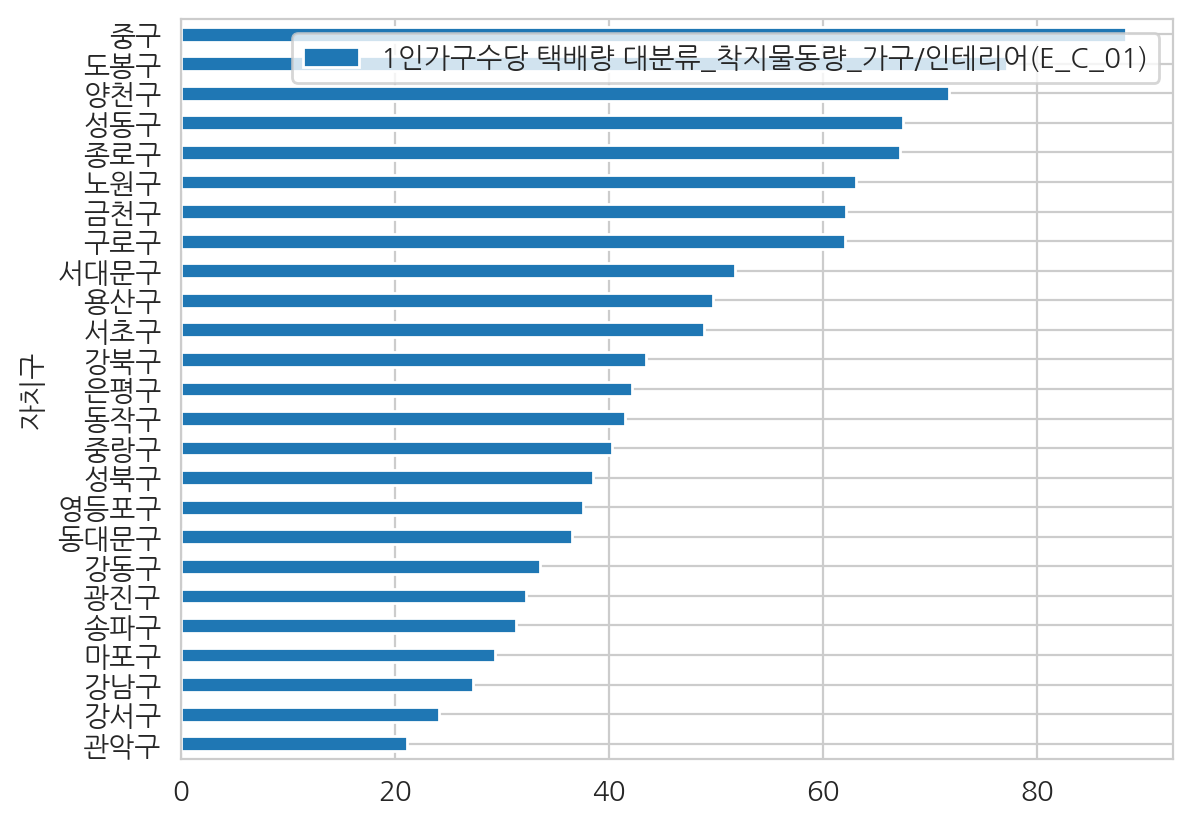

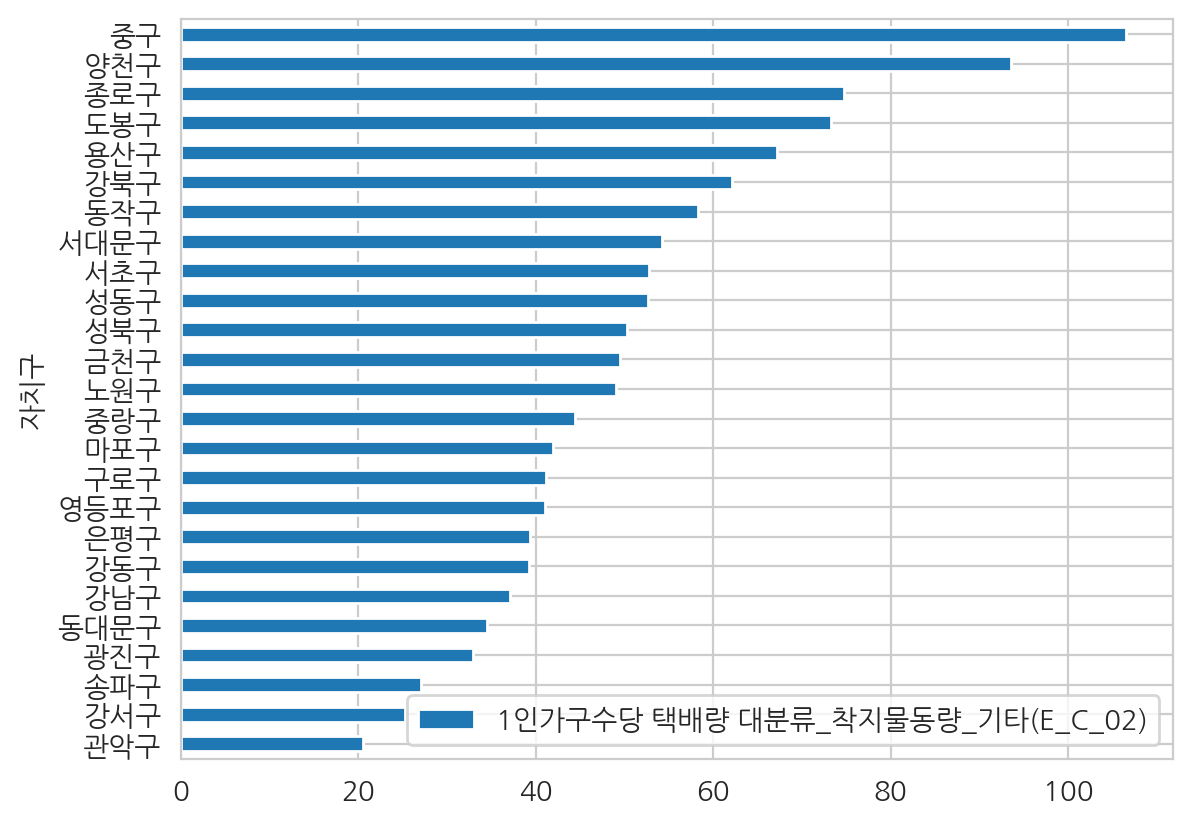

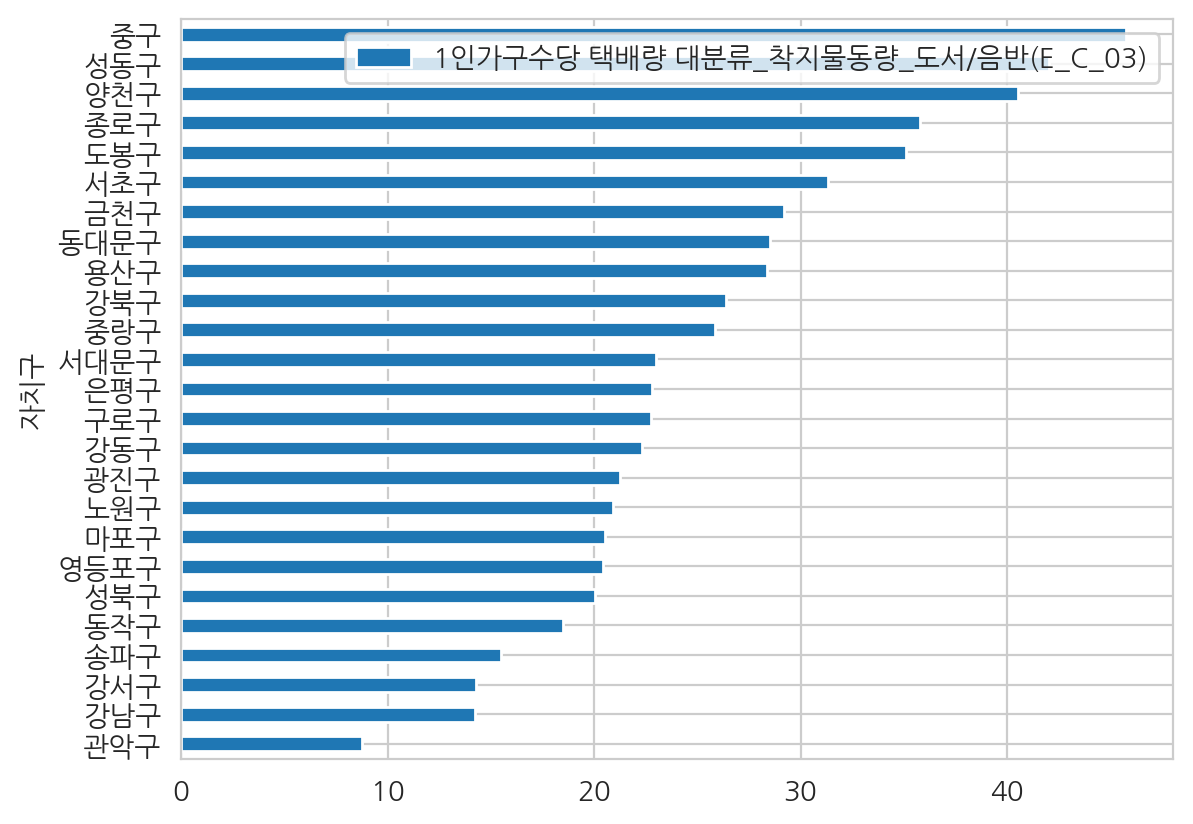

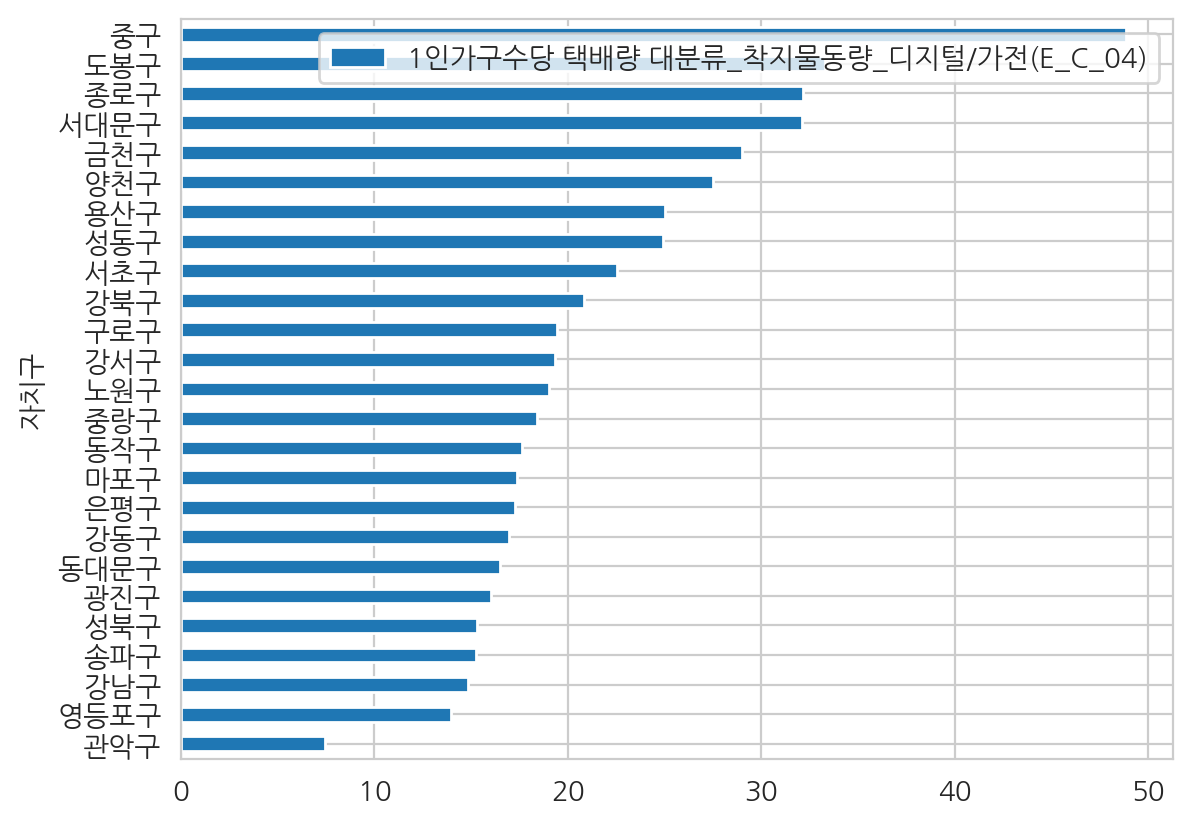

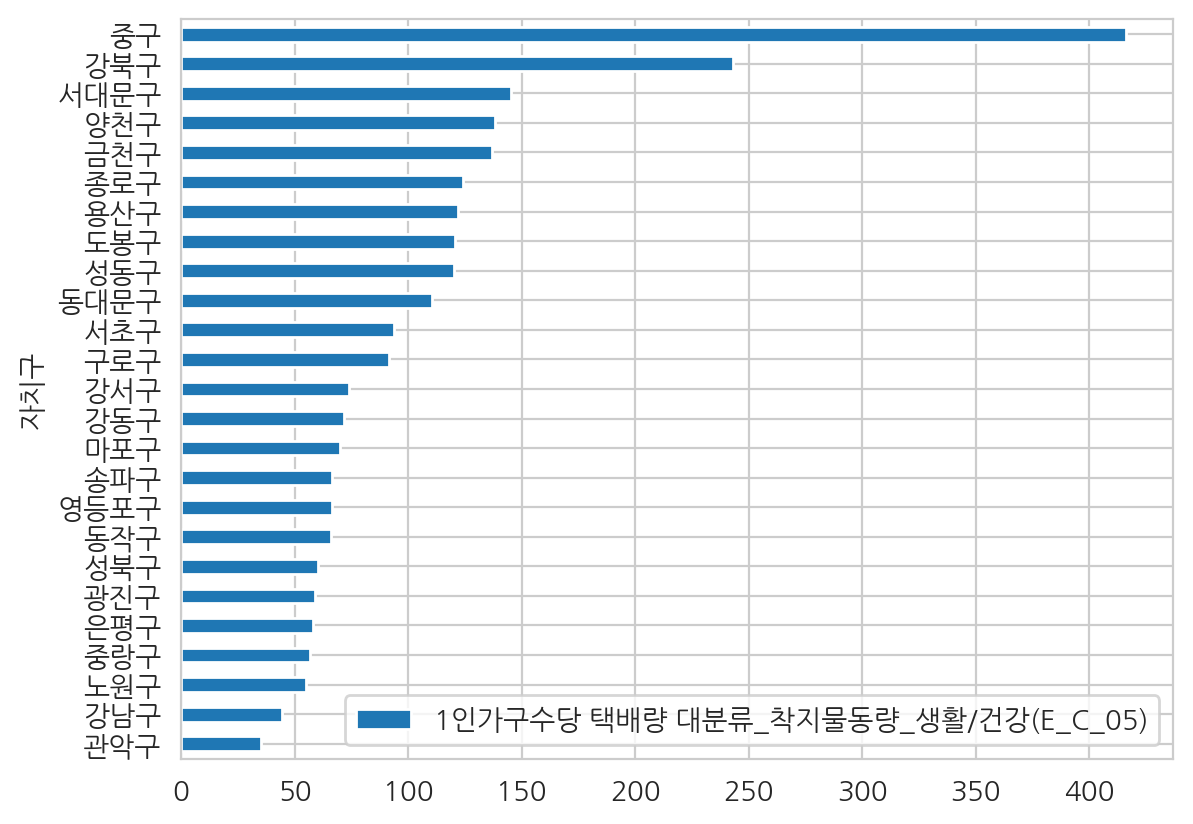

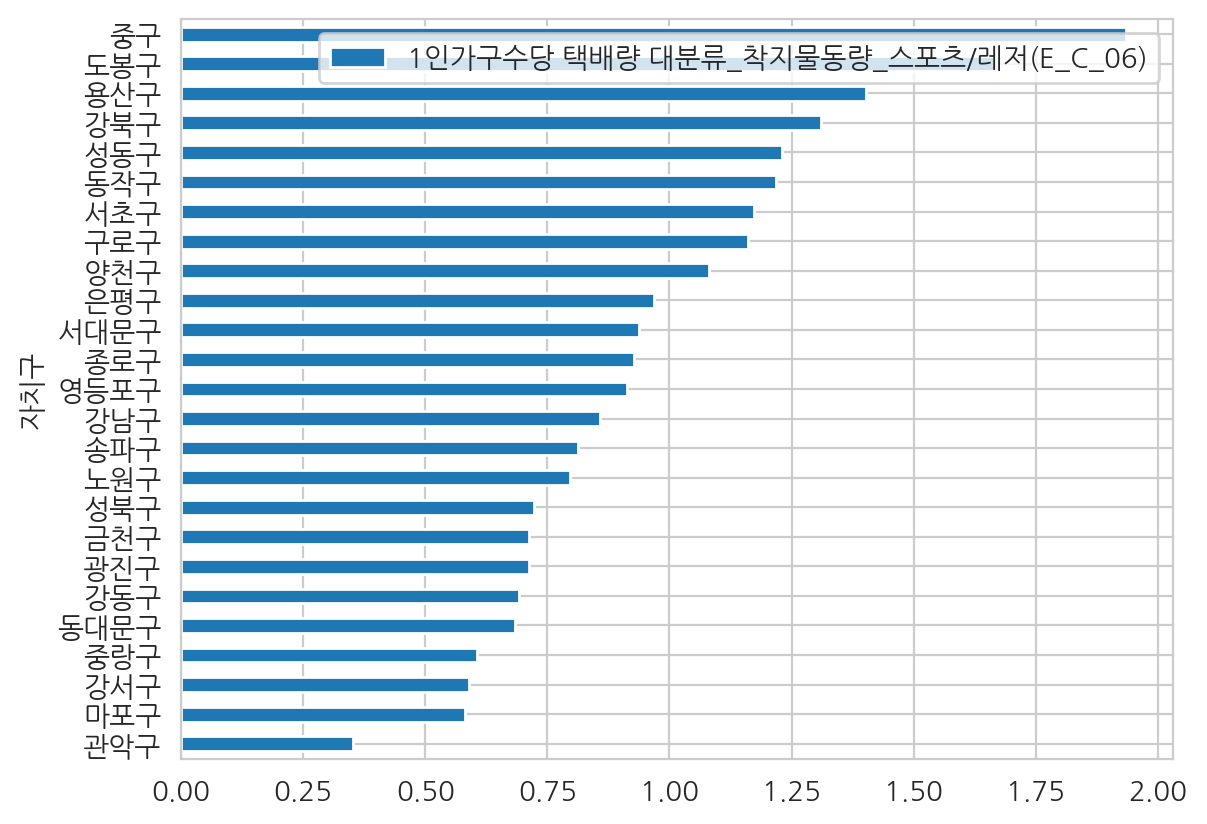

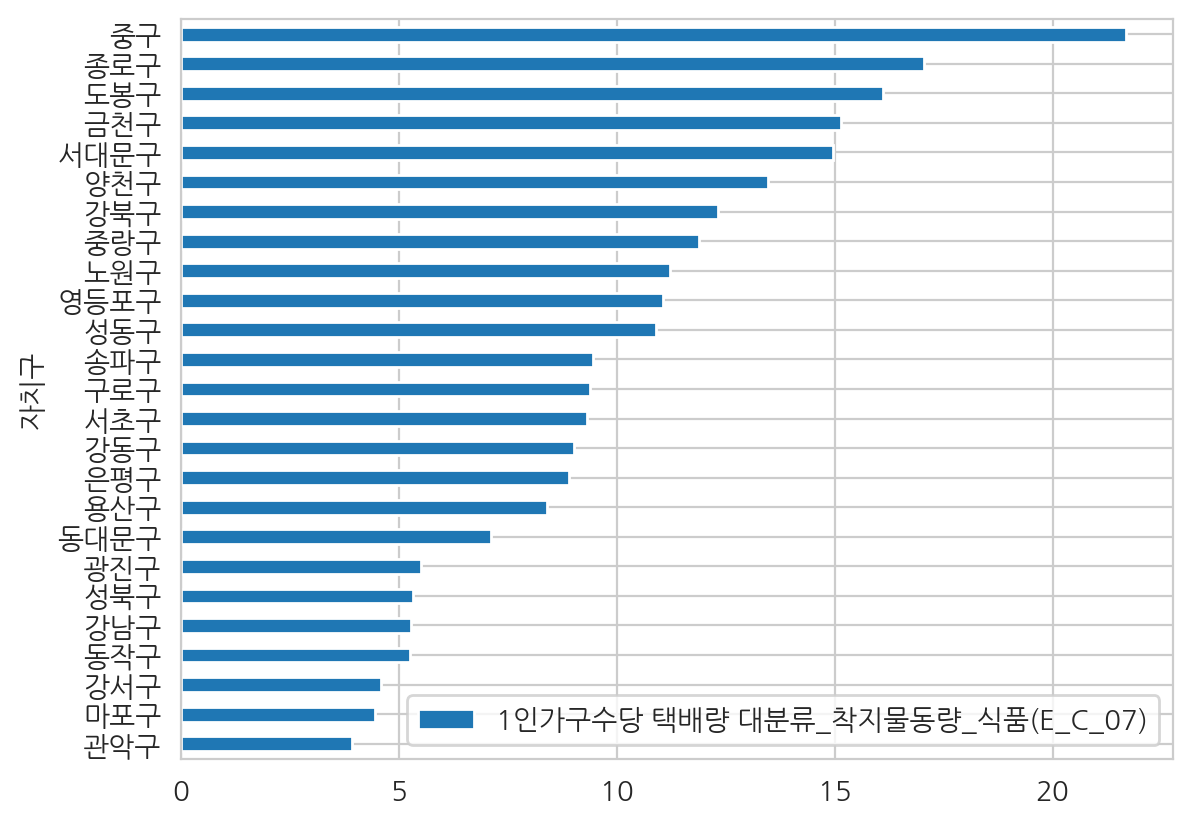

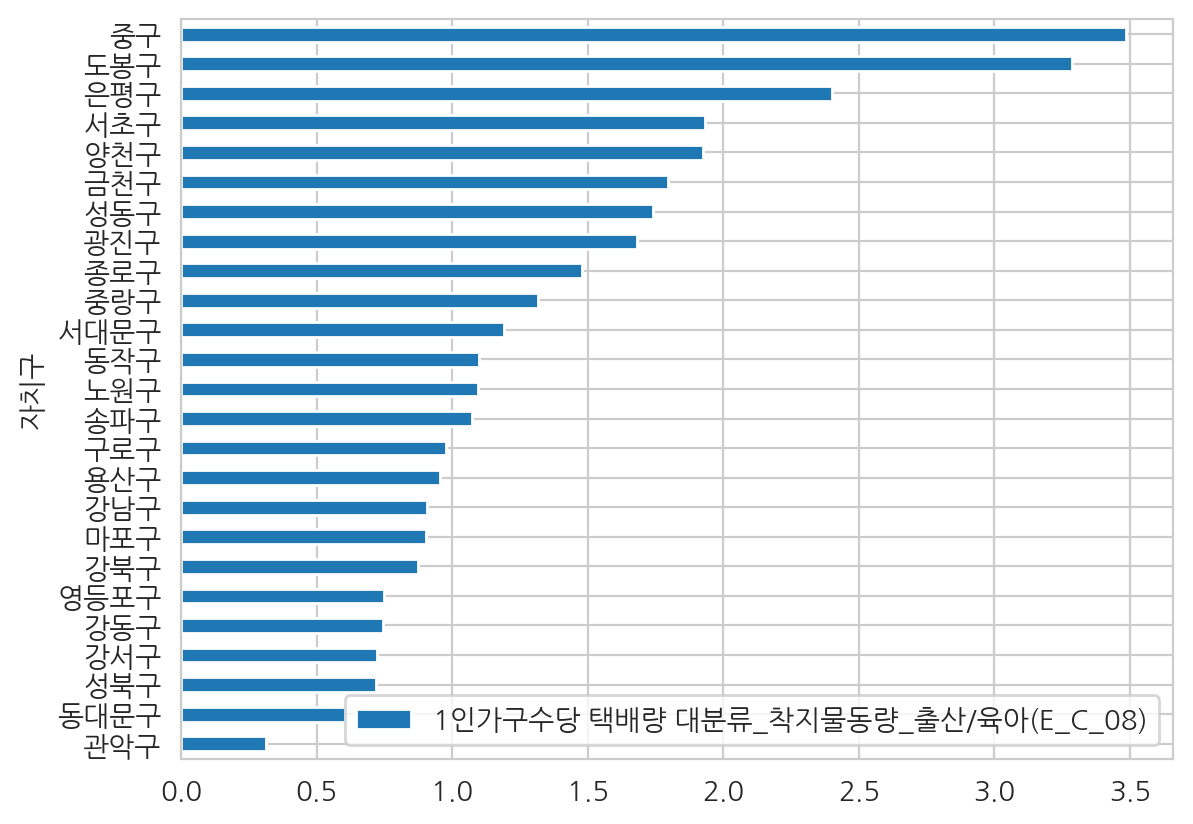

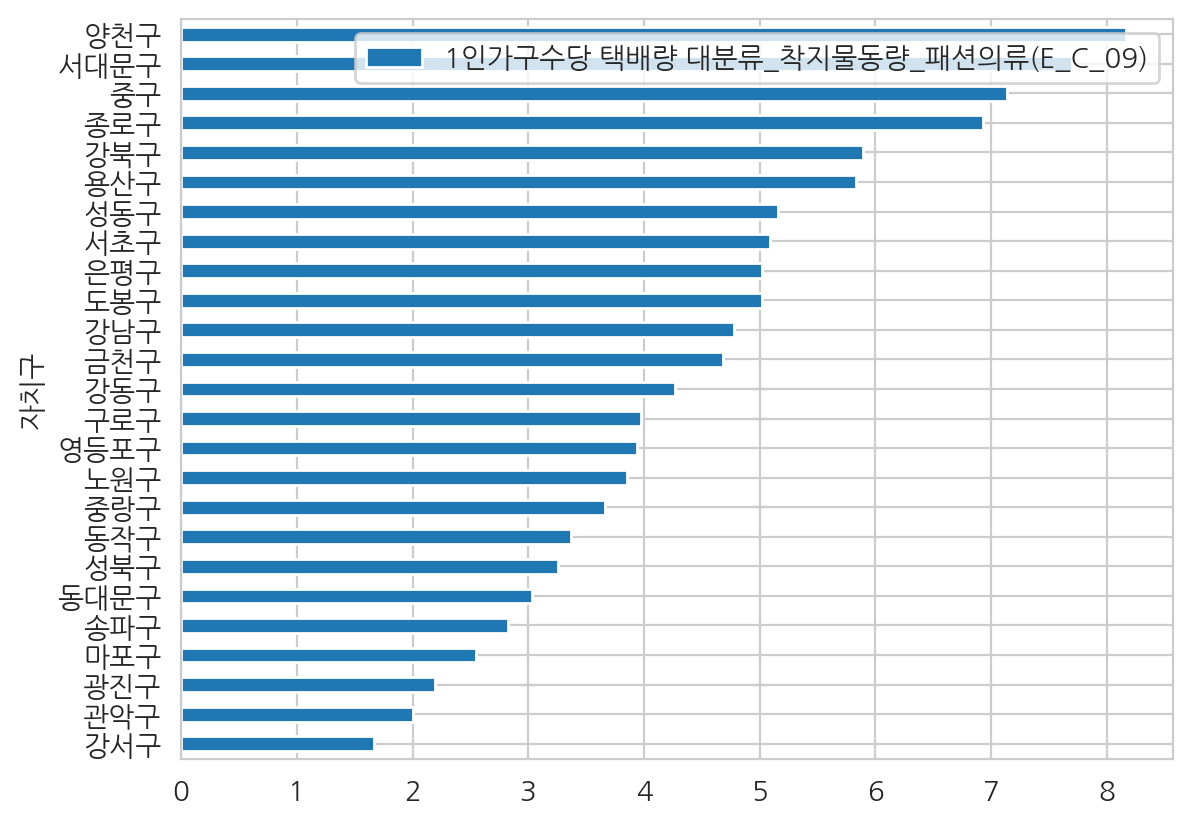

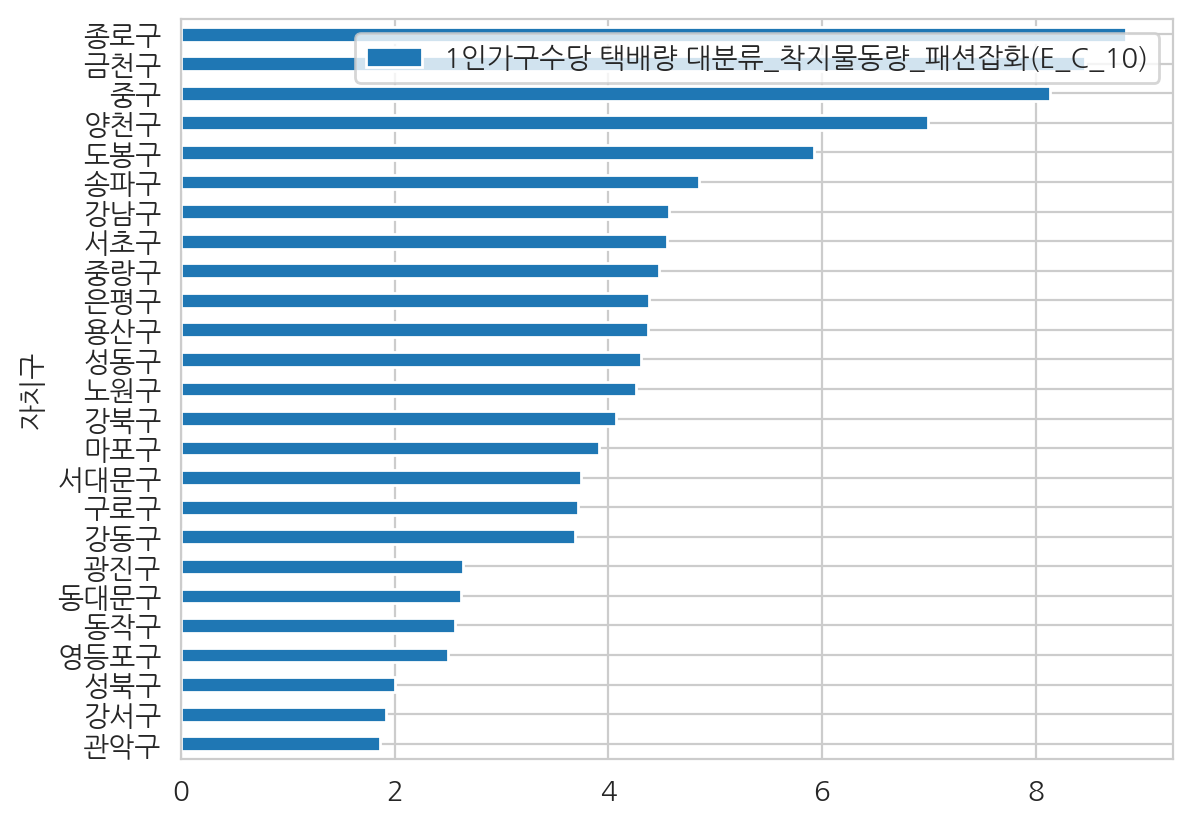

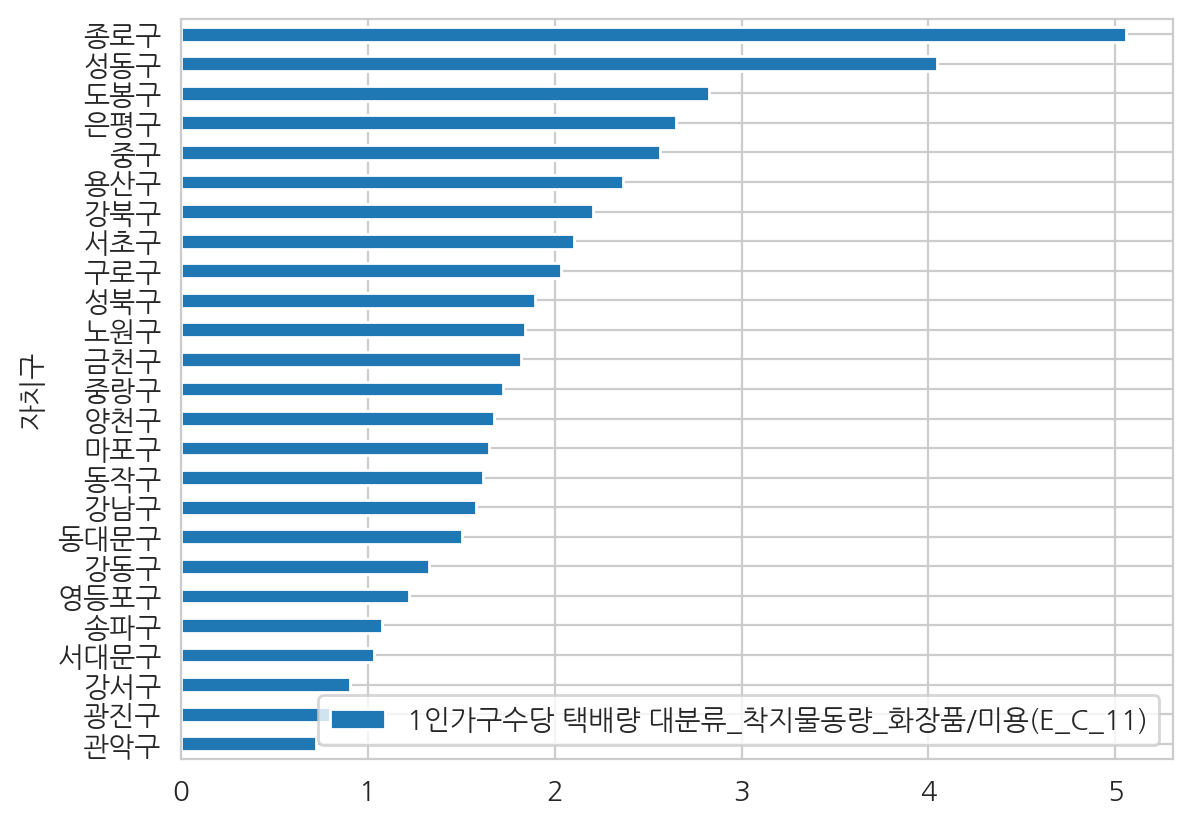

In [19]:
for dbr in collist_dbr:
  shop.sort_values(by=dbr,ascending=True).plot('자치구',str(dbr),kind='barh')
  plt.show()